<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))

Le tableau comporte 1416 observation(s) ou article(s)


In [4]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))
#La nature des données dans chacune des colonnes
print("La nature des données dans les colonnes est :\n", population.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print("Valeur présente dans chaque colonne :\n", population.count())

Le tableau comporte 3 colonne(s)
La nature des données dans les colonnes est :
 Zone       object
Année       int64
Valeur    float64
dtype: object
Valeur présente dans chaque colonne :
 Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [5]:
#Affichage les 5 premières lignes de la table
population[0:5]

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] =  population['Valeur'] * 1000

In [7]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population[0:5]

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))

Le tableau comporte 15605 observation(s) ou article(s)


In [10]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))


Le tableau comporte 18 colonne(s)


In [11]:
nan_count = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].isna().sum()
non_nan_count = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].notna().sum()

total = nan_count + non_nan_count

# Calcul des proportions
nan_proportion = (nan_count / total) * 100
non_nan_proportion = (non_nan_count / total) * 100

# Affichage des résultats
print(f"Proportion de NaN : {nan_proportion:.2f}%")
print(f"Proportion de non-NaN : {non_nan_proportion:.2f}%")

Proportion de NaN : 8.74%
Proportion de non-NaN : 91.26%


In [12]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire[0:5]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [13]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [14]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes_tonnes_tokg = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for elt in colonnes_tonnes_tokg:
    dispo_alimentaire[elt] *= 1000

In [15]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire[0:5]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [16]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))

Le tableau comporte 1475 observation(s) ou article(s)


In [17]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 4 colonne(s)


In [18]:
#Affichage les 5 premières lignes de la table
aide_alimentaire[0:5]

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [19]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'})

In [20]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000

In [21]:
#Affichage les 5 premières lignes de la table
aide_alimentaire[0:5]

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [22]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))

Le tableau comporte 1218 observation(s) ou article(s)


In [23]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 3 colonne(s)


In [24]:
#Afficher les 5 premières lignes de la table
sous_nutrition[0:5]

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [25]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace('<', '', regex=True)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

In [26]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement 
# les lignes qui ne sont pas des nombres en NaN)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)

In [27]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'})

In [28]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1000000

In [29]:
#Afficher les 5 premières lignes de la table
sous_nutrition[0:5]

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse des données</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [30]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous 
# nutrition, en ciblant l'année 2017
population2017 = population[population['Année'] == 2017]
sous_nutrition2017 = sous_nutrition[sous_nutrition['Année'].str.contains("2016-2018", na=False)]
populationSousNutrition2017 = pd.merge(population2017, sous_nutrition2017, on='Zone', how='inner')
populationSousNutrition2017 = populationSousNutrition2017.rename(columns={'Année_x': 'Année'})
del populationSousNutrition2017["Année_y"]

population2017Mondiale = population2017['Population'].sum()

In [31]:
#Affichage du dataset
populationSousNutrition2017

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,8000000.0
199,Viet Nam,2017,94600648.0,6500000.0
200,Yémen,2017,27834819.0,0.0
201,Zambie,2017,16853599.0,0.0


In [32]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
nbPersonneSousNutrition2017 =  populationSousNutrition2017['sous_nutrition'].sum()
print(round((nbPersonneSousNutrition2017/population2017Mondiale), 2))

0.07


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [33]:
#Combien mange en moyenne un être humain ? 
#Source => https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte.html#:~:text=Les%20apports%20en%20énergie%20des%20adultes&text=Pour%20un%20homme%20adulte%2C%20l,800%20à%202%20200%20calories.
kcalHomme = 2500
kcalFemme = 2000
kcalHumain = (kcalHomme + kcalFemme) / 2
kcalHumain

2250.0

In [34]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dispoAlimentaire2017 = pd.merge(population2017, dispo_alimentaire, on='Zone', how='inner')

In [35]:
#Affichage du nouveau dataframe
dispoAlimentaire2017


,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000.0,0.0,6000.0,37000.0,0.0,32000.0,0.0,0.0,0.0
15412,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000.0,0.0,6000.0,70000.0,0.0,64000.0,0.0,0.0,0.0
15413,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000.0,7.0,2.29,0.21,1.12,34000.0,3000.0,1000.0,32000.0,0.0,36000.0,0.0,0.0,0.0
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000.0,0.0,2000.0,4000.0,0.0,2000.0,0.0,0.0,0.0


In [36]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement (par an ?)
dispoAlimentaire2017['dispo_kcal'] = dispoAlimentaire2017['Disponibilité alimentaire (Kcal/personne/jour)'] * dispoAlimentaire2017['Population'] * 365
print("dispo alimentaire totale en kcal :", dispoAlimentaire2017['dispo_kcal'].sum(), "kcal")

dispo alimentaire totale en kcal : 7635429388975815.0 kcal


In [37]:
#Calcul du nombre d'humains pouvant être nourris sur une base de 2250kcal/jour
total_h_kcal = round(dispoAlimentaire2017['dispo_kcal'].sum()/(2250*365))
print("Total d'être humain pouvant être nourris :", total_h_kcal)
print("Proportion :", "{:.2f}".format(total_h_kcal*100/population.loc[population['Année'] == 2017,"Population"].sum()), "%")

Total d'être humain pouvant être nourris : 9297326501
Proportion : 123.17 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [38]:
#Transfert des données avec les végétaux dans un nouveau dataframe
vegetale = dispoAlimentaire2017[dispoAlimentaire2017['Origine'] == "vegetale"]

In [39]:
#Calcul du nombre de kcal disponible pour les végétaux
dispoKcalMondialVegetale = vegetale['dispo_kcal'].sum()
print(dispoKcalMondialVegetale)

6300178937197865.0


In [40]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux 2250
kcalVegetaleAnHumain = round(vegetale['dispo_kcal'].sum()/(2250*365))
print("Total d'être humain pouvant être nourris :", kcalVegetaleAnHumain)
print("Proportion :", round((kcalVegetaleAnHumain*100/population.loc[population['Année'] == 2017,"Population"].sum()), 2), "%")

Total d'être humain pouvant être nourris : 7671450761
Proportion : 101.63 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [41]:
#Calcul de la disponibilité totale intérieur 
dispoInterieur = dispoAlimentaire2017['Disponibilité intérieure'].sum()
print(dispoInterieur)
#9 733 927 000

9733927000.0


In [42]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
colonnes_interessees = ['Aliments pour animaux', 'Pertes', 'Nourriture']

# Boucle à travers les colonnes d'intérêt
for colonne in colonnes_interessees:
        resultatColonnes = dispoAlimentaire2017[colonne].sum()
        print(f"Somme des valeurs pour {colonne}: {resultatColonnes}")

Somme des valeurs pour Aliments pour animaux: 1288002000.0
Somme des valeurs pour Pertes: 452283000.0
Somme des valeurs pour Nourriture: 4805525000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [43]:
#Création d'une liste avec toutes les variables
produits_uniques = dispoAlimentaire2017['Produit'].unique()
#print(produits_uniques)

cereales = ['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres']

In [44]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
dispoCereale = dispoAlimentaire2017[dispoAlimentaire2017['Produit'].isin(cereales)]
dispoCereale

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
7,Afghanistan,2017,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,...,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0,1.813662e+13
12,Afghanistan,2017,36296113.0,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
32,Afghanistan,2017,36296113.0,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,...,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0,2.782097e+11
34,Afghanistan,2017,36296113.0,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,...,13000.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0,3.974424e+10
40,Afghanistan,2017,36296113.0,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,...,524000.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0,3.444501e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15374,Zimbabwe,2017,14236595.0,Millet,vegetale,0.0,0.0,23.0,2.93,0.20,...,55000.0,0.0,0.0,41000.0,3000.0,55000.0,3000.0,7000.0,0.0,1.195162e+11
15382,Zimbabwe,2017,14236595.0,Orge,vegetale,3000.0,0.0,2.0,0.24,0.01,...,66000.0,10000.0,16000.0,3000.0,4000.0,60000.0,1000.0,55000.0,0.0,1.039271e+10
15399,Zimbabwe,2017,14236595.0,Riz (Eq Blanchi),vegetale,0.0,0.0,101.0,10.09,0.19,...,158000.0,1000.0,156000.0,143000.0,0.0,0.0,0.0,15000.0,2000.0,5.248321e+11
15400,Zimbabwe,2017,14236595.0,Seigle,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00


In [45]:
#Affichage de la proportion d'alimentation animale
dispoAnimal = dispoAlimentaire2017[dispoAlimentaire2017['Origine'] == 'animale']
proportionDispoAnimal = dispoAnimal['Disponibilité alimentaire (Kcal/personne/jour)'].sum()/dispoAlimentaire2017['Disponibilité alimentaire (Kcal/personne/jour)'].sum()*100

print('La proportion de disponibilité animal est de',round(proportionDispoAnimal, 2),"%")


La proportion de disponibilité animal est de 19.4 %


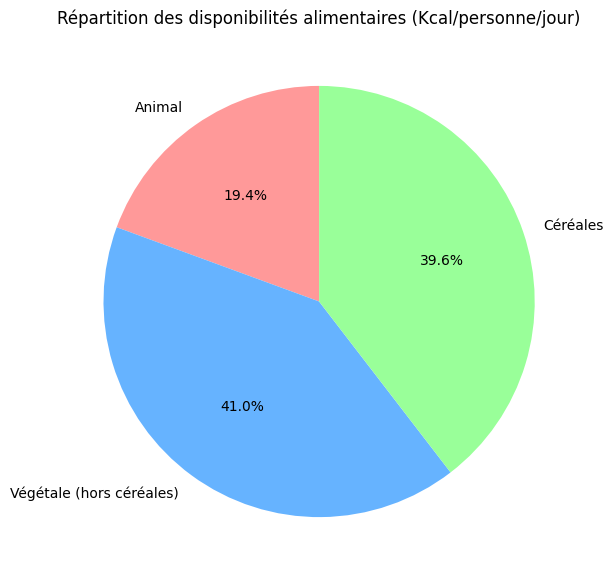

In [46]:
dispoVegetale = dispoAlimentaire2017[
    (dispoAlimentaire2017['Origine'] == 'vegetale') & 
    ~(dispoAlimentaire2017['Produit'].isin(cereales))
]
dispoVegetale = dispoVegetale['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
proportionDispoVegetale = dispoVegetale/dispoAlimentaire2017['Disponibilité alimentaire (Kcal/personne/jour)'].sum()*100


dispoCereale = dispoAlimentaire2017[
    (dispoAlimentaire2017['Origine'] == 'vegetale') & 
    (dispoAlimentaire2017['Produit'].isin(cereales))
]
dispoCereale = dispoCereale['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
proportionDispoCereale= dispoCereale/dispoAlimentaire2017['Disponibilité alimentaire (Kcal/personne/jour)'].sum()*100

dispoAnimal = dispoAlimentaire2017[dispoAlimentaire2017['Origine'] == 'animale']
proportionDispoAnimal = dispoAnimal['Disponibilité alimentaire (Kcal/personne/jour)'].sum()/dispoAlimentaire2017['Disponibilité alimentaire (Kcal/personne/jour)'].sum()*100

# Labels pour les catégories
labels = ['Animal', 'Végétale (hors céréales)', 'Céréales']

# Proportions correspondantes
proportions = [proportionDispoAnimal, proportionDispoVegetale, proportionDispoCereale]

# Création du diagramme en camembert
plt.figure(figsize=(7, 7))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

# Titre du diagramme
plt.title('Répartition des disponibilités alimentaires (Kcal/personne/jour)')

# Afficher le graphique
plt.show()

In [47]:
dispoCerealeKg = dispoAlimentaire2017[
    (dispoAlimentaire2017['Origine'] == 'vegetale') & 
    (dispoAlimentaire2017['Produit'].isin(cereales))
]

totalPop20217 = population2017['Population'].sum()

dispoCerealeParAnimal = dispoCerealeKg.groupby('Produit')['Aliments pour animaux'].sum()
dispoCerealeKg = dispoCerealeKg.groupby('Produit')['Disponibilité alimentaire en quantité (kg/personne/an)'].sum() * totalPop20217

df_cereales = pd.DataFrame({
    'Céréales': cereales,
    'Disponibilité pour les humains (kg/an)': dispoCerealeKg / 1000,
    'Disponibilité pour les animaux (kg/an)': dispoCerealeParAnimal / 1000
})
# Afficher le tableau
df_cereales 

#vérifier

,Céréales,Disponibilité pour les humains (kg/an),Disponibilité pour les animaux (kg/an)
Produit,,,
Avoine,Blé,1.075307e+09,15865.0
Blé,Riz (Eq Blanchi),9.169632e+10,121686.0
"Céréales, Autres",Orge,1.457318e+09,18782.0
Maïs,Maïs,2.783352e+10,544746.0
Millet,Seigle,3.872872e+09,3290.0
Orge,Avoine,1.982291e+09,88798.0
Riz (Eq Blanchi),Millet,4.055824e+10,33581.0
Seigle,Sorgho,1.893902e+09,8073.0
Sorgho,"Céréales, Autres",4.634705e+09,24794.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [48]:
#Création de la colonne proportion par pays
# Calcul de la proportion nombre d'habitants / personnes sous-nourries
populationSousNutrition2017['Prop_pop_sous_N'] = populationSousNutrition2017['sous_nutrition'] / populationSousNutrition2017['Population'] * 100

#Affichage du résultat
print(populationSousNutrition2017)

                                       Zone  Année  Population  \
0                               Afghanistan   2017  36296113.0   
1                            Afrique du Sud   2017  57009756.0   
2                                   Albanie   2017   2884169.0   
3                                   Algérie   2017  41389189.0   
4                                 Allemagne   2017  82658409.0   
..                                      ...    ...         ...   
198  Venezuela (République bolivarienne du)   2017  29402484.0   
199                                Viet Nam   2017  94600648.0   
200                                   Yémen   2017  27834819.0   
201                                  Zambie   2017  16853599.0   
202                                Zimbabwe   2017  14236595.0   

     sous_nutrition  Prop_pop_sous_N  
0        10500000.0        28.928718  
1         3100000.0         5.437666  
2          100000.0         3.467203  
3         1300000.0         3.140917  
4           

                                Zone  Année  Population  sous_nutrition  \
51                         Dominique   2017     71458.0        100000.0   
164  Saint-Vincent-et-les Grenadines   2017    109827.0        100000.0   
98                          Kiribati   2017    114158.0        100000.0   
167             Sao Tomé-et-Principe   2017    207089.0        100000.0   
78                             Haïti   2017  10982366.0       5300000.0   
157                        RPD Corée   2017  25429825.0      12000000.0   
108                       Madagascar   2017  25570512.0      10500000.0   
103                          Libéria   2017   4702226.0       1800000.0   
100                          Lesotho   2017   2091534.0        800000.0   
183                            Tchad   2017  15016753.0       5700000.0   

     Prop_pop_sous_N  
51        139.942344  
164        91.052291  
98         87.597891  
167        48.288417  
78         48.259182  
157        47.188685  
108        41

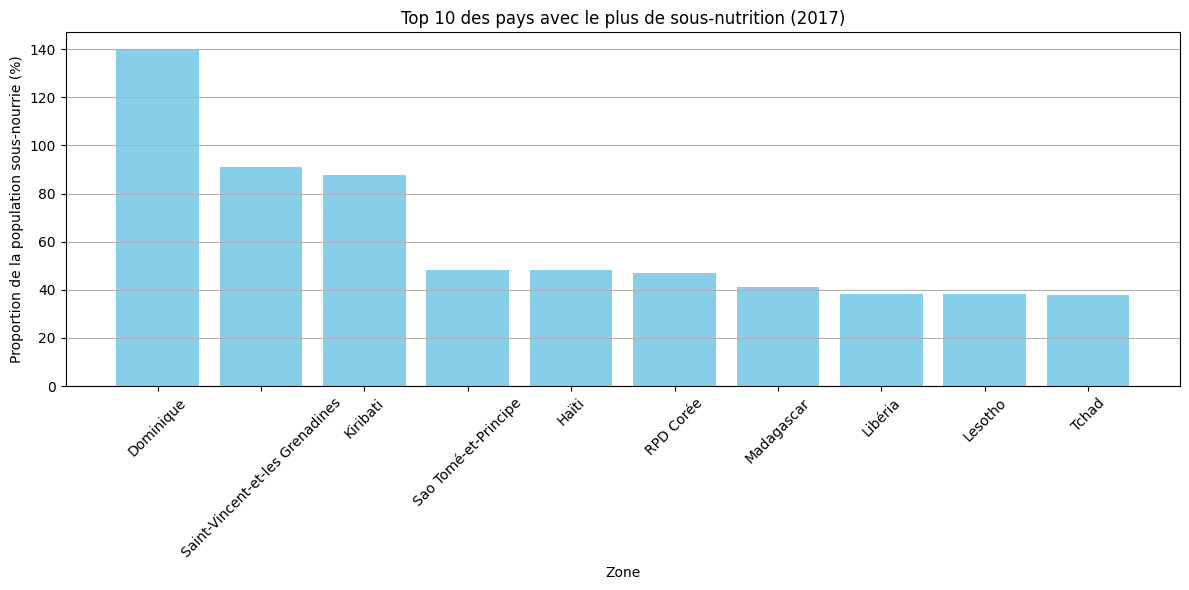

In [49]:
#affichage après trie des 10 pires pays
populationSousNutrition2017['Zone'] = populationSousNutrition2017['Zone'].replace('République populaire démocratique de Corée', 'RPD Corée')
# populationSousNutrition2017['Zone'] = populationSousNutrition2017['Zone'].replace('République populaire démocratique de Corée', 'RPD Corée')
paysAvecPlusDeSousNutrition = populationSousNutrition2017.sort_values(by='Prop_pop_sous_N', ascending=False)
paysAvecPlusDeSousNutrition[0 : 10]

# Obtenir les 10 premiers pays
top_10_sous_nutrition = paysAvecPlusDeSousNutrition.head(10)
print(top_10_sous_nutrition)
# Création du graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(top_10_sous_nutrition['Zone'], top_10_sous_nutrition['Prop_pop_sous_N'], color='skyblue')
plt.title('Top 10 des pays avec le plus de sous-nutrition (2017)')
plt.xlabel('Zone')
plt.ylabel('Proportion de la population sous-nourrie (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()  # Ajuste la mise en page
plt.show()

#la valeur de: Dominique, Saint-Vincent-et-les Grenadines, Kiribati, Sao Tomé-et-Principe est de 100000 mais ce chiffre
#n'est pas juste car la valeur initiale du tableau est <0.1... ce qui n'est pas une donnée exploitable 

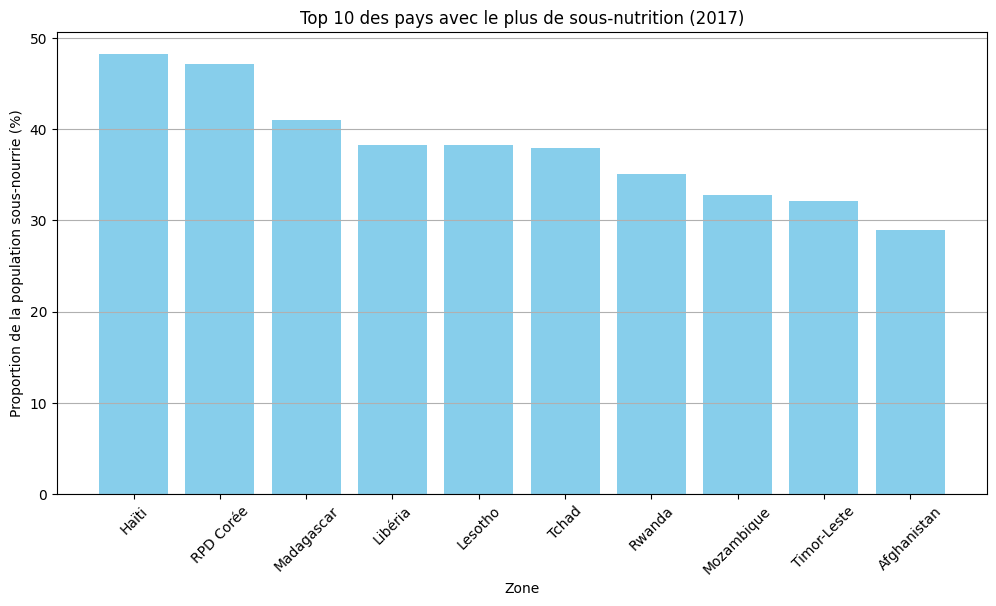

In [50]:
populationSousNutrition2017_filtered = populationSousNutrition2017[populationSousNutrition2017['sous_nutrition'] != 100000.0]

# Trier par proportion de population sous-nourrie
paysAvecPlusDeSousNutrition = populationSousNutrition2017_filtered.sort_values(by='Prop_pop_sous_N', ascending=False)

# Obtenir les 10 premiers pays
top_10_sous_nutrition = paysAvecPlusDeSousNutrition.head(10)

# Création du graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(top_10_sous_nutrition['Zone'], top_10_sous_nutrition['Prop_pop_sous_N'], color='skyblue')
plt.title('Top 10 des pays avec le plus de sous-nutrition (2017)')
plt.xlabel('Zone')
plt.ylabel('Proportion de la population sous-nourrie (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

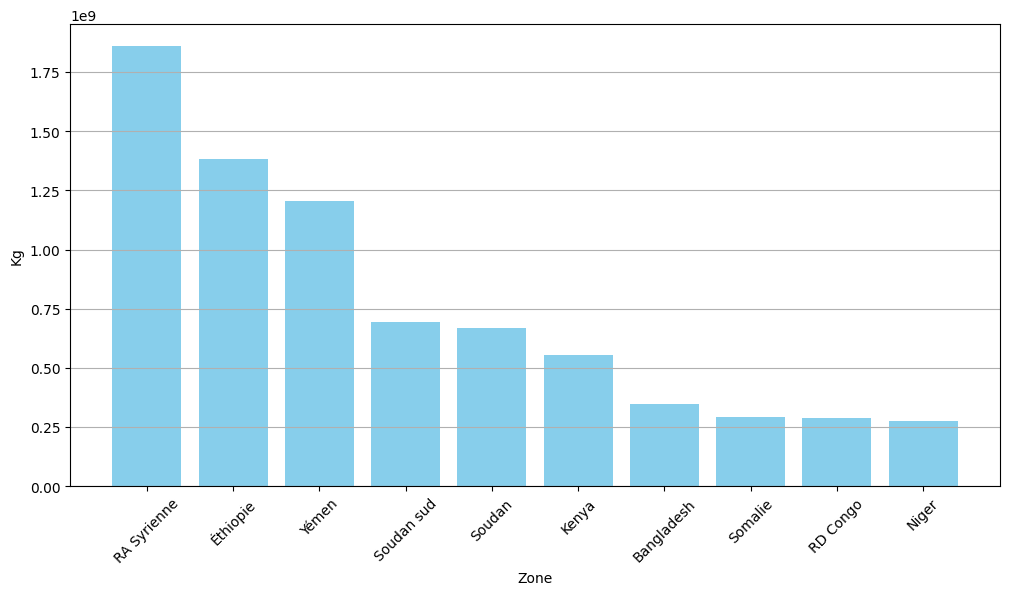

In [51]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_alimentaire['Zone'] = aide_alimentaire['Zone'].replace('République arabe syrienne', 'RA Syrienne')
aide_alimentaire['Zone'] = aide_alimentaire['Zone'].replace('Soudan du Sud', 'Soudan sud')
aide_alimentaire['Zone'] = aide_alimentaire['Zone'].replace('République démocratique du Congo', 'RD Congo')


aideAlimentaireParZone = aide_alimentaire.groupby('Zone').sum('Valeur')

top10AideAlimentaire = aideAlimentaireParZone.sort_values(by='Valeur', ascending=False)

top10AideAlimentaire = top10AideAlimentaire[0 :10]

plt.figure(figsize=(12, 6))
bars = plt.bar(top10AideAlimentaire.index, top10AideAlimentaire['Valeur'], color='skyblue')

plt.xlabel('Zone')
plt.ylabel('Kg')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

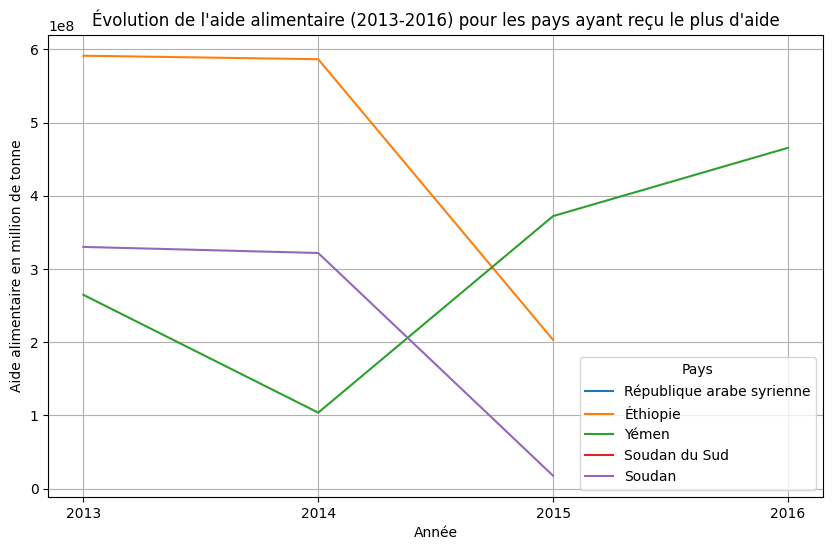

In [52]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aideAlimentaireParZoneAnnee = aide_alimentaire.groupby(['Zone', 'Année']).sum('Valeur').reset_index()
pays_cibles = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']
pays2013_2016Aide = aideAlimentaireParZoneAnnee[(aideAlimentaireParZoneAnnee['Année'] >= 2013) & 
                                                (aideAlimentaireParZoneAnnee['Année'] <= 2016) & 
                                                (aideAlimentaireParZoneAnnee['Zone'].isin(pays_cibles))]

# Création du graphique
plt.figure(figsize=(10, 6))

for pays in pays_cibles:
    data_pays = pays2013_2016Aide[pays2013_2016Aide['Zone'] == pays]
    plt.plot(data_pays['Année'], data_pays['Valeur'], label=pays)

# Ajout des labels et du titre
plt.title("Évolution de l'aide alimentaire (2013-2016) pour les pays ayant reçu le plus d'aide")
plt.xlabel("Année")
plt.ylabel("Aide alimentaire en million de tonne")
plt.xticks([2013, 2014, 2015, 2016])
plt.legend(title="Pays")
plt.grid(True)

# Affichage du graphique
plt.show()

In [53]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
sommeAideByPays = pays2013_2016Aide.groupby('Zone')['Valeur'].sum()
aideAlimentaire2013_2016 = aideAlimentaireParZoneAnnee.sort_values(by='Valeur', ascending=False)
print(aideAlimentaire2013_2016.head(5))

            Zone  Année     Valeur
156  RA Syrienne   2014  651870000
225     Éthiopie   2013  591404000
226     Éthiopie   2014  586624000
155  RA Syrienne   2013  563566000
157  RA Syrienne   2015  524949000


In [54]:
#On filtre sur le dataframe avec notre liste
#La consigne n'est pas clair.  

In [55]:
# Affichage des pays avec l'aide alimentaire par année
print(aideAlimentaireParZoneAnnee)

            Zone  Année     Valeur
0    Afghanistan   2013  128238000
1    Afghanistan   2014   57214000
2        Algérie   2013   35234000
3        Algérie   2014   18980000
4        Algérie   2015   17424000
..           ...    ...        ...
223       Égypte   2013    1122000
224     Équateur   2013    1362000
225     Éthiopie   2013  591404000
226     Éthiopie   2014  586624000
227     Éthiopie   2015  203266000

[228 rows x 3 columns]


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [56]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispoAlimentairePays = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispoAlimentairePays = dispoAlimentairePays.reset_index(name='Disponibilité alimentaire en Kcal')
dispoAlimentairePays

,Zone,Disponibilité alimentaire en Kcal
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


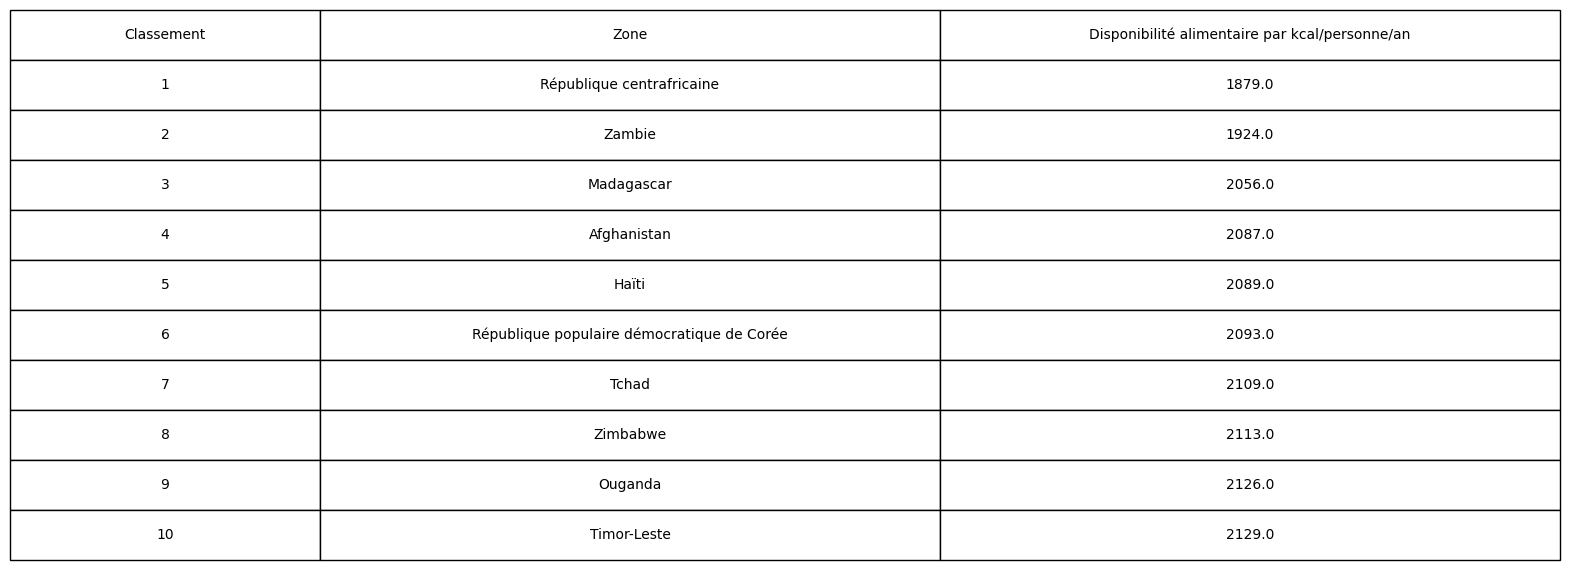

In [57]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
dispoAlimentairePaysKcal = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispoAlimentairePaysKcal = dispoAlimentairePaysKcal.reset_index(name='Disponibilité alimentaire par kcal/personne/an')
dispoAlimentairePaysKcal = dispoAlimentairePaysKcal.sort_values(by='Disponibilité alimentaire par kcal/personne/an', ascending=True).head(10)

dispoAlimentairePaysKcal['Classement'] = range(1, 11)

# Réorganiser les colonnes pour que le classement soit en premier
dispoAlimentairePaysKcal = dispoAlimentairePaysKcal[['Classement', 'Zone', 'Disponibilité alimentaire par kcal/personne/an']]

# Création d'un tableau sous forme de graphique avec Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))  # Taille du tableau
ax.axis('tight')
ax.axis('off')

# Ajuster la largeur des colonnes : la première (Classement) à 50% et les deux autres à 25% chacune
column_widths = [0.2, 0.4, 0.4]

# Créer le tableau avec des proportions ajustées
table = ax.table(cellText=dispoAlimentairePaysKcal.values,
                 colLabels=dispoAlimentairePaysKcal.columns,
                 cellLoc='center', 
                 loc='center',
                 colWidths=column_widths)

table.scale(2, 3)
# Afficher le tableau
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [58]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispoAlimentaireKcal = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispoAlimentaireKg = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire en quantité (kg/personne/an)'].sum()

dispoAlimentaire = pd.concat([dispoAlimentaireKcal, dispoAlimentaireKg], axis=1)
#dispoAlimentaire.columns = ['Disponibilité Kcal', 'Disponibilité kg']

print(dispoAlimentaire)

                       Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                    2087.0   
Afrique du Sud                                                 3020.0   
Albanie                                                        3188.0   
Algérie                                                        3293.0   
Allemagne                                                      3503.0   
...                                                               ...   
Émirats arabes unis                                            3275.0   
Équateur                                                       2346.0   
États-Unis d'Amérique                                          3682.0   
Éthiopie                                                       2129.0   
Îles Salomon                                                   2383.0   

                       Disponibilité alimentaire e

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

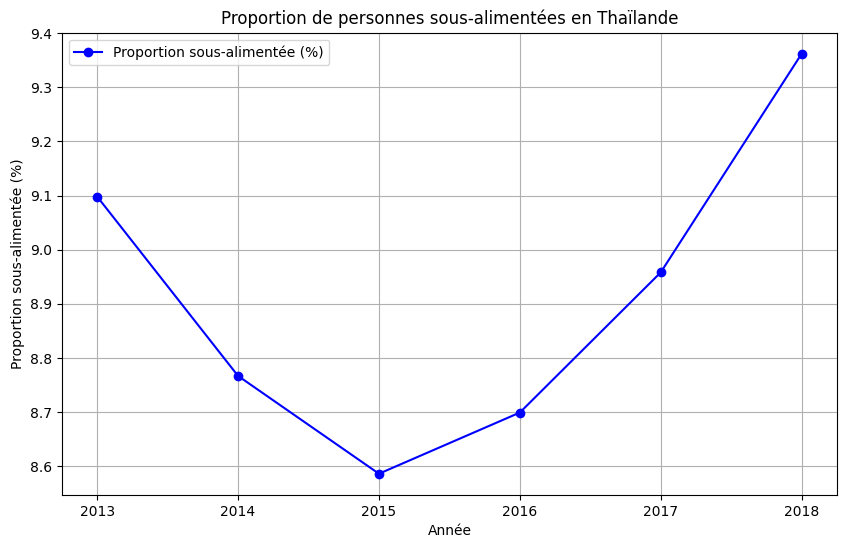

In [59]:
#création d'un dataframe avec uniquement la Thaïlande 
dispoAlimentaireThailande = dispo_alimentaire[dispo_alimentaire['Zone'] == 'Thaïlande'] 
nutritionThailande = sous_nutrition[sous_nutrition['Zone'] == 'Thaïlande']
populationThailande = population[population['Zone'] == 'Thaïlande']


# Fonction pour extraire la valeur intermédiaire
def get_intermediate_year(year_range):
    start_year, end_year = map(int, year_range.split('-'))
    return (start_year + end_year) // 2

nutritionThailande.loc[:, 'Année'] = nutritionThailande['Année'].apply(get_intermediate_year)
df_thailande = pd.merge(nutritionThailande, populationThailande, on=['Zone', 'Année'])

# Calcul de la proportion sous-alimentée en pourcentage
df_thailande['Proportion sous-alimentée (%)'] = (df_thailande['sous_nutrition'] / df_thailande['Population']) * 100

# Création d'un graphique pour représenter la proportion de personnes sous-alimentées
plt.figure(figsize=(10, 6))
plt.plot(df_thailande['Année'], df_thailande['Proportion sous-alimentée (%)'], marker='o', linestyle='-', color='blue', label='Proportion sous-alimentée (%)')
plt.title('Proportion de personnes sous-alimentées en Thaïlande')
plt.xlabel('Année')
plt.ylabel('Proportion sous-alimentée (%)')
plt.grid(True)
plt.legend()

# Afficher le graphique
plt.show()



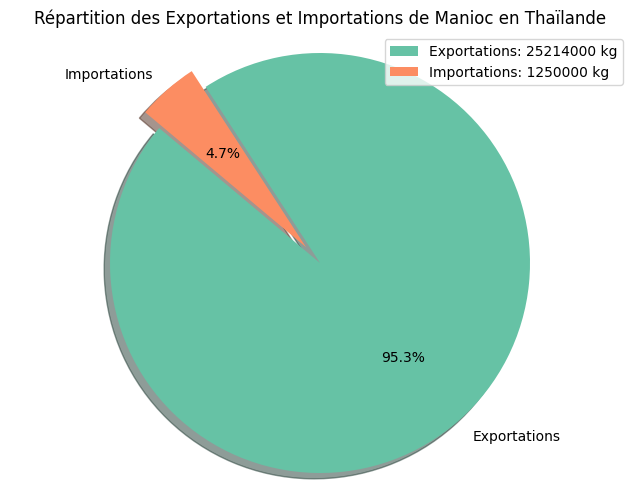

In [60]:
# On calcule la proportion exportée en fonction de la proportion
#la proporionn exportée par rapport à la proportion de quoi ????
#supposons l'apport export du manioc en lien avec le diapo..
dispoAlimentaireThailandeManioc = dispoAlimentaireThailande[dispoAlimentaireThailande['Produit'] == 'Manioc']

somme_exportations = dispoAlimentaireThailandeManioc['Exportations - Quantité'].sum()
somme_importations = dispoAlimentaireThailandeManioc['Importations - Quantité'].sum()



labels = ['Exportations', 'Importations']
sizes = [somme_exportations, somme_importations]
colors = ['#66c2a5', '#fc8d62']  # Couleurs personnalisées pour le camembert
explode = (0.1, 0)  # Pour faire ressortir la première portion (Exportations)

plt.figure(figsize=(8, 6))
# Créer le camembert avec des pourcentages
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.axis('equal')  # Assure que le camembert est un cercle
plt.title('Répartition des Exportations et Importations de Manioc en Thaïlande')

# Ajouter une légende avec les chiffres
plt.legend([f'Exportations: {int(somme_exportations)} kg', f'Importations: {int(somme_importations)} kg'], loc='upper right')

plt.show()


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse complémentaires</h2>
</div>

In [61]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

#IL DOIT Y AVOIR UNE ERREUR DANS LES DEMANDES, QUI EST MELANIE ??? !!!

In [62]:
#perte alimentaire 
perteAlimentaire = dispo_alimentaire['Autres Utilisations'].sum()
print(perteAlimentaire, 'Kg')

865023000.0 Kg


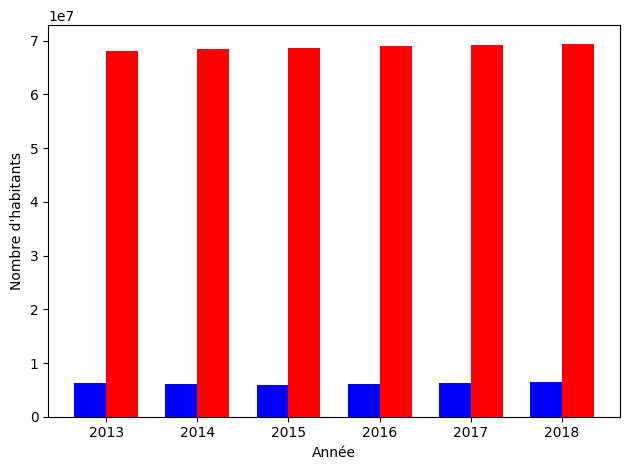

In [63]:
# Extraire les données
names = df_thailande['Année']
values_sous_population = df_thailande['sous_nutrition']
values_population = df_thailande['Population']

# Configurer les positions pour les barres
bar_width = 0.35  # Largeur des barres
x = range(len(names))  # Positions des barres

# Créer le diagramme à barres avec les bonnes années en abscisse
plt.bar([p - bar_width/2 for p in x], values_sous_population, width=bar_width, color='b')
plt.bar([p + bar_width/2 for p in x], values_population, width=bar_width, color='r')

# Ajouter des labels et un titre
plt.xlabel('Année')
plt.ylabel('Nombre d\'habitants')
plt.xticks(ticks=x, labels=names)  # Utiliser les années comme labels sur l'axe x


# Afficher le diagramme
plt.tight_layout()
plt.show()

In [64]:
paysPeuDispoAlimentaire = dispoAlimentaire.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)
popuDispoSous = pd.merge(paysPeuDispoAlimentaire, population2017, on=['Zone'])
popuDispoSous['Zone'] = popuDispoSous['Zone'].replace('République populaire démocratique de Corée', 'RPD Corée')
popuDispoSous

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Année,Population
0,République centrafricaine,1879.0,453.73,2017,4596023.0
1,Zambie,1924.0,350.12,2017,16853599.0
2,Madagascar,2056.0,425.07,2017,25570512.0
3,Afghanistan,2087.0,351.41,2017,36296113.0
4,Haïti,2089.0,397.78,2017,10982366.0
5,RPD Corée,2093.0,458.93,2017,25429825.0
6,Tchad,2109.0,319.45,2017,15016753.0
7,Zimbabwe,2113.0,336.59,2017,14236595.0
8,Ouganda,2126.0,535.58,2017,41166588.0
9,Timor-Leste,2129.0,369.10,2017,1243258.0
